<a href="https://colab.research.google.com/github/anatejerom/PRA3024/blob/main/Assignment_1_challenge_1_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
from gwpy.timeseries import TimeSeries
data = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1") #to download data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [2]:
print(data) #to see data

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: None)


In [3]:
data.duration #to see duration of data

<Quantity 128. s>

In [4]:
data.sample_rate #to see sample rate of data

<Quantity 4096. Hz>

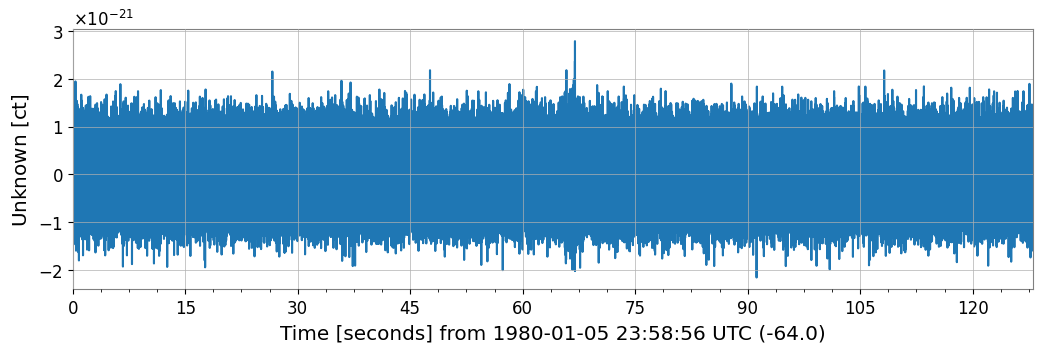

In [5]:
%matplotlib inline
plot = data.plot()

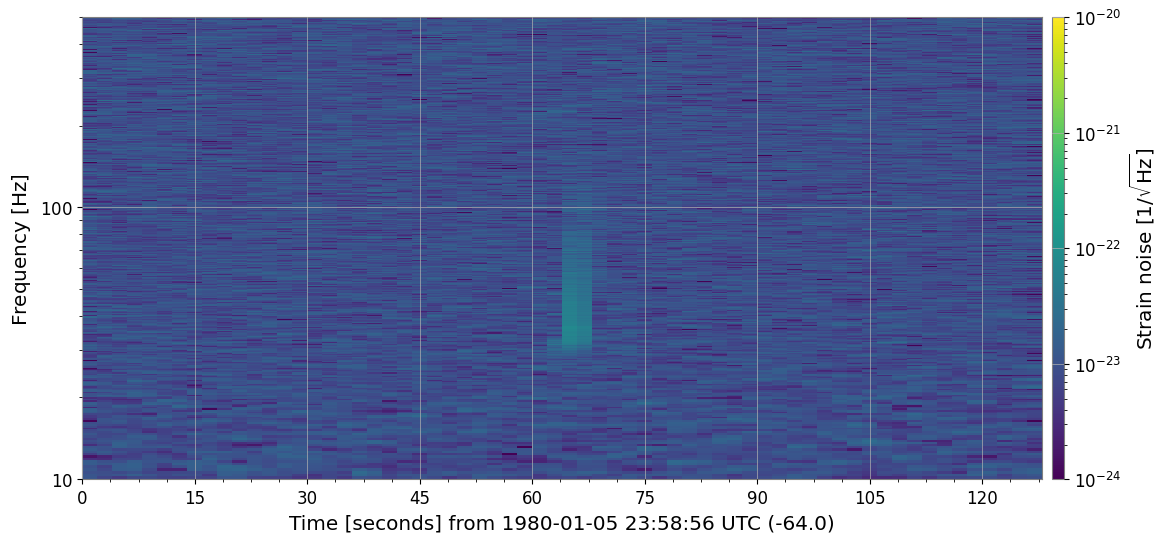

In [6]:
#to plot spectrogram
specgram = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)


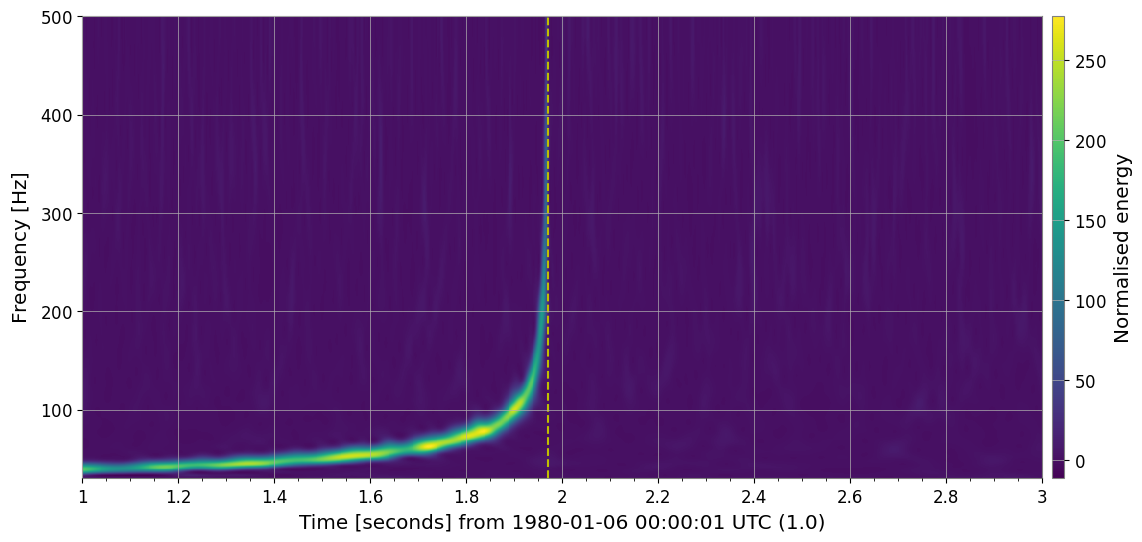

In [7]:
#to make and plot the q transform
q = data.q_transform(frange=(30, 500),qrange=(10,15),outseg=(2,4))
plot = q.plot()
plot.colorbar(label="Normalised energy")
import matplotlib.pyplot as plt
plt.axvline(x=2.97, color='y', linestyle='--')#to plot a line and try to find the best match
plt.show()

In [ ]:
## we found the time of the merger to be at an x value of 2.97 seconds
